# Using Alogorithms and AI to Solve a Real-World Problem
## Neil Urquhart - Edinburgh Napier University
## n.urquhart@napier.ac.uk

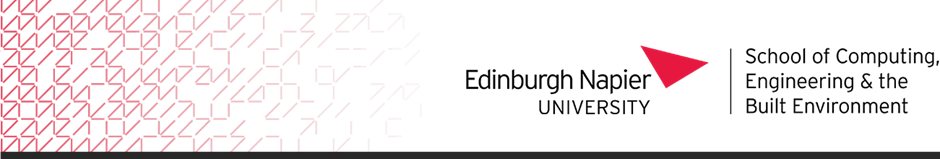

# What are we going to do?

- Learn about problems
- Play with Python
- Understand a bit more about how to solve problems
- Have some fun!


# The Travelling Salesperson Problem (TSP)


*"A salesperson has to visit a number of addresses, they must visit each address once and once only. How do we find the sortest route for the salesperson?"*

There are lots of everyday problems based on the TSP:

- Supermarket home deliveries
- Amazon deliveries
- Smart meter installations
- Postal deliveries

Being able to solve the TSP is very useful.


# The Travelling Salesperson Problem (TSP)


This workshop will explain a number of ways in which we can solve the TSP.  

We'll be using the Python language to help us.

The workshop is divided into cells (like this one), some of the cells are just for reading (like this) and some have some Python code in them (like the one below). When you've finished reading this, press the "run" button (at the top) and we'll move onto the next cell, press the run button again to run the Python code in the next cell.

In [27]:
# This cell contains some code written in the python language.
# To run the code press CONTROL+ENTER
# The code below sets up the demonstration.
import sys
!{sys.executable} -m pip install utm
import pandas as pd
import utm
import math
import matplotlib.pyplot as plt
import random
import warnings

import tspcode as tsp
tsp.setup()

1633.93s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


FileNotFoundError: [Errno 2] No such file or directory: './edinburgh.csv'

## 1. A Problem for Us to Solve

In the center of Edinburgh we need to make 26 deliveries (A-Z), we start and finish from Edinburgh Castle.



## Task: can you re-arrange the route to make it shorter, what's the 


Run the code below (CONTROL+ENTER)
Re-arrange the route (visits A to Z) into an order that gives the shortest distance

39.100236267


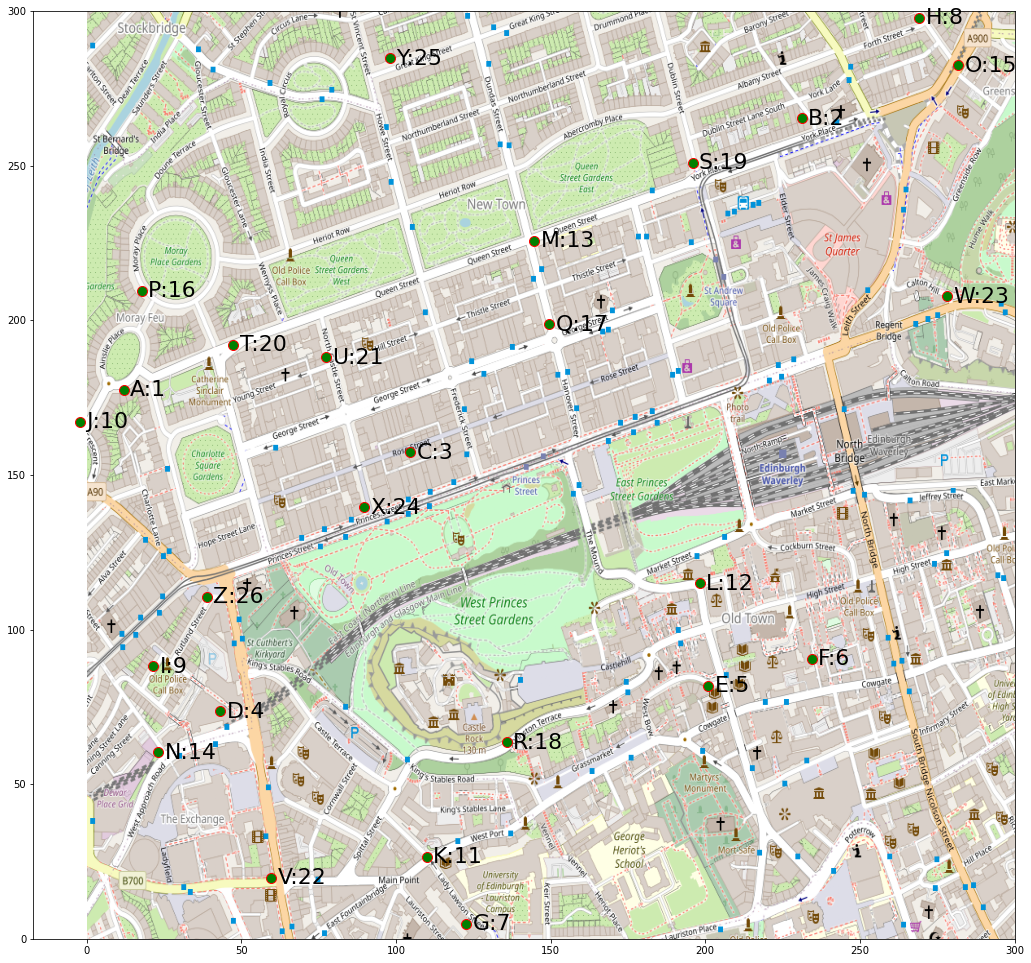

In [4]:
route = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
print(tsp.measure (route))
tsp.drawMap(route)


The problem that we have is that there are far too many possible routes for us to try each one. 

How many routes are there?

If there were 4 visits A-D then the possible routes would be :

ABCD  ABDC
ACDB  ACBD
ADBC  ADCB
BACD  BADC
BCAD  BCDA
BDAC  BDCA
CABD  CADB
CBAD  CBDA
CDAB  CDBA
DABC  DACB
DBAC  DBCA
DCAB  DCBA



The number of possible routes (24) can be worked out by 4x3x2x1 = 24

For our problem with 26 visits there would be: 40329146112660570000000000  !!!

That's too many routes for us to check each one, and it would take the computer several hours to work through them.

This is known in maths as a *factorial*
Useless fact ... once the number of visits is more than 50, the number of possible routes is greater than the number of atoms in the visible universe.

##  2. Building a route

Rather than testing every single route, we can write a program to build a route using a simple rule called the nearest neighbour heuristic. When deciding which visit to make next, always go to the closest visit available to you.

So, if we start at the Castle the nearest visit is 'R', then it is 'G' and so on.....




In [5]:
solution = ''
remaining = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
best =''

while len(remaining) > 0:
    best, remaining = tsp.neighbour(best,remaining)
    solution = solution +best

print(tsp.measure(solution))
print(solution)


14.373743870999999
RGKVZIDNTAJPUXCQMSBHOWFELY


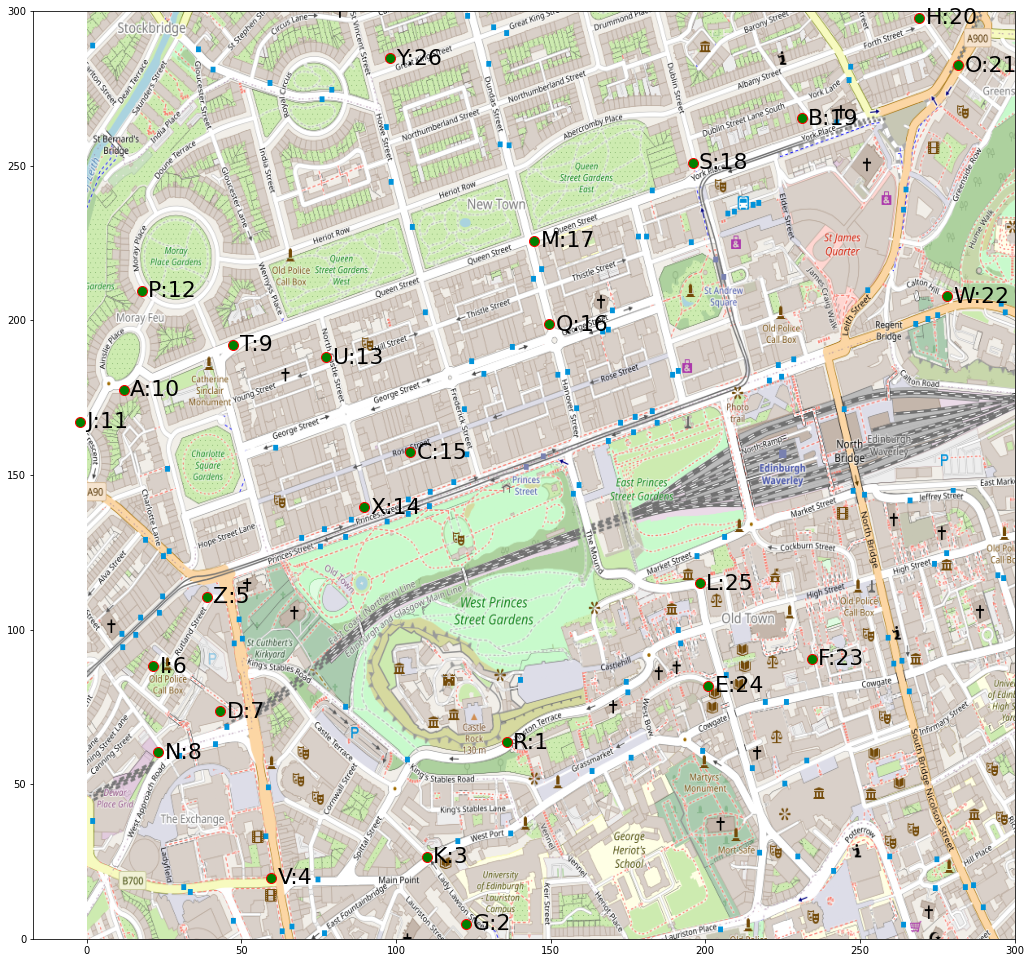

In [6]:
tsp.drawMap(solution)

## 3. A Simple hill climber.....

This is a simple AI algorithm.

It works by trying randome swaps of deliveries, if a swap makes the route shorter, keep it, otherwise ignore it.

In [7]:
tries = 500 # Try swapping 50 times!
solution = tsp.shuffle('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
best = tsp.measure (solution)

for x in range(0, tries):
    old = solution #solution.copy()
    solution = tsp.random_change(solution)
    n = tsp.measure (solution)
    if (n >= best):
        solution = old
    else:
        print(str(x) + " Found new best! "+ str(n))
        best = n



['Q', 'G', 'D', 'N', 'P', 'L', 'O', 'R', 'A', 'J', 'F', 'Z', 'B', 'E', 'M', 'I', 'Y', 'X', 'U', 'H', 'C', 'T', 'W', 'S', 'V', 'K']
0 Found new best! 35.956424496000004
4 Found new best! 34.33935949600001
8 Found new best! 34.16508045500001
9 Found new best! 33.66874045500001
10 Found new best! 32.68171745500001
14 Found new best! 32.58253345400001
16 Found new best! 32.36682949400001
20 Found new best! 31.393209495000004
32 Found new best! 31.018422495000006
33 Found new best! 30.494243495000003
39 Found new best! 28.886227496000007
45 Found new best! 28.886227495000004
46 Found new best! 28.681623495000007
49 Found new best! 27.444732495000007
54 Found new best! 26.454934495000007
63 Found new best! 25.661556495000006
64 Found new best! 25.320971496000002
72 Found new best! 25.136275455000003
91 Found new best! 24.853098066000005
94 Found new best! 24.615300455000003
96 Found new best! 24.353440502
104 Found new best! 22.434718502
115 Found new best! 21.970796502
126 Found new best! 2

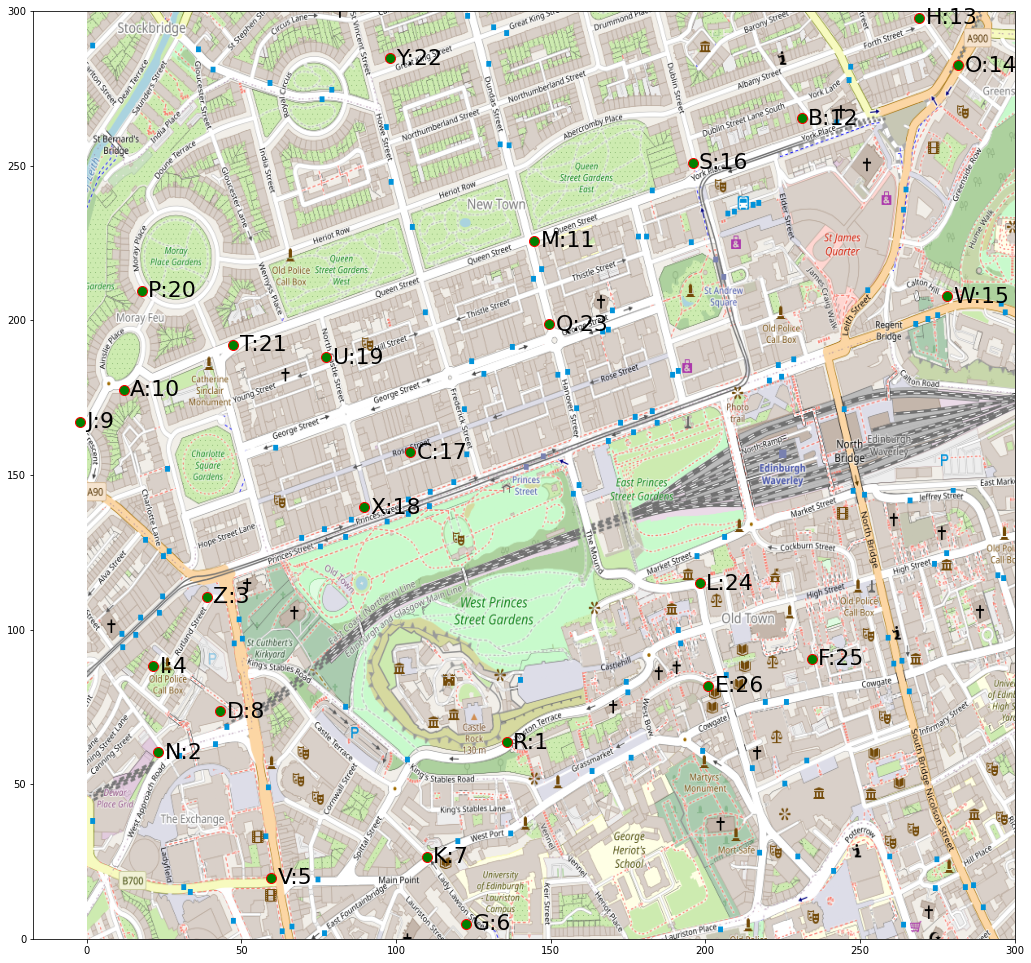

In [8]:
tsp.drawMap(solution)

- Does the hill climber get a better result than nearest-neighbour?
- Do we get the same result every time?
- What happens if you increase the number of tries?

Go back and try running again!

# Thanks for comming along and taking part!



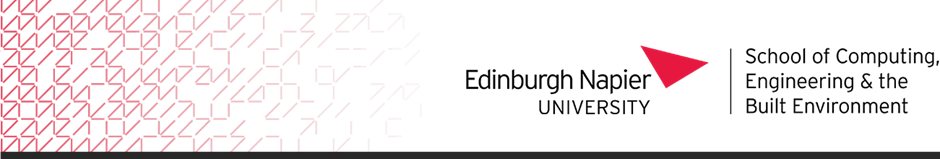